<a href="https://colab.research.google.com/github/effepivi/gvxr-demos/blob/main/12-move-detector/12-move-detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install -q ipympl

    from google.colab import output
    output.enable_custom_widget_manager()

    from google.colab import drive
    drive.mount('/content/drive')

    !pip install -q --force-reinstall "/content/drive/MyDrive/Colab Notebooks/gvxr-2.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl"
else:
    !pip install -q gvxr

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [2]:
current_folder = str(globals()['_dh'][0])

In [3]:
%matplotlib widget

import math, os
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [4]:
if not os.path.exists(current_folder + "/img"):
    os.mkdir(current_folder + "/img")

In [5]:
from gvxrPython3 import gvxr
from gvxrPython3 import json2gvxr
gvxr.useLogFile()

# Create an OpenGL context
# MS Windows
if os.name == "nt":
    print("Creating an OpenGL context using EGL is not possible on Microsoft Windows")
    print("A window will be created but not displayed")
    gvxr.createWindow(0, True, "OPENGL");
# MacOS
elif str(os.uname()).find("Darwin") >= 0:
    print("Creating an OpenGL context using EGL is not possible on MacOS")
    print("A window will be created but not displayed")
    gvxr.createWindow(0, True, "OPENGL");
# GNU/Linux
else:
    print("Create an OpenGL context using EGL")
    gvxr.createWindow(0, 1, "EGL");

3.8.16 (default, Dec  7 2022, 01:36:19) 
[Clang 13.0.0 (clang-1300.0.29.30)]
3.8.16 (default, Dec  7 2022, 01:36:19) 
[Clang 13.0.0 (clang-1300.0.29.30)]


Tue Oct 24 12:38:51 2023 ---- Use Spekpy to generate beam spectrums from tube voltages.


SimpleGVXR 2.0.7 (2023-10-24T11:21:16) [Compiler: Apple Clang] on Darwin
gVirtualXRay core library (gvxr) 2.0.7 (2023-10-24T11:21:14) [Compiler: Apple Clang] on Darwin
Creating an OpenGL context using EGL is not possible on MacOS
A window will be created but not displayed


In [6]:
def printDetector():
    print("Detector position:", gvxr.getDetectorPosition("cm"), "cm")
    print("Detector up vector:", gvxr.getDetectorUpVector())
    print("Detector right vector:", gvxr.getDetectorRightVector())
    print("Detector size:", gvxr.getDetectorSize("cm"), "cm")
    print("Detector number of pixels:", gvxr.getDetectorNumberOfPixels())
    # print("Detector pixel spacing:", gvxr.getDetectorNumberOfPixels())

In [7]:
# Locate the sample STL file from the package directory
path = os.path.dirname(gvxr.__file__)
fname = path + "/welsh-dragon-small.stl"

gvxr.loadMeshFile("Dragon", fname, "mm")

gvxr.moveToCentre("Dragon");
# gvxr.applyCurrentLocalTransformation("Dragon");

gvxr.setElement("Dragon", "C")
gvxr.setColour("Dragon", 0.5, 0.7, 0, 1)

In [8]:
gvxr.setDetectorPosition(10.0, 0.0, 0.0, "cm");
gvxr.setDetectorUpVector(0, 0, -1);
gvxr.setDetectorNumberOfPixels(640, 320);
gvxr.setDetectorPixelSize(0.5, 0.5, "mm");
gvxr.setScintillator("CsI", 600, "um");

In [9]:
gvxr.usePointSource();
gvxr.setSourcePosition(-40.0,  0.0, 0.0, "cm");
gvxr.setVoltage(150, "kV")
gvxr.addFilter("Al", 10, "mm");
gvxr.addFilter("Cu", 5, "mm");
filtered_bins = gvxr.getEnergyBins("keV");
filtered_counts= np.array(gvxr.getPhotonCountEnergyBins());

from scipy import signal
x = filtered_bins
y = filtered_counts
nb_channels = 15
f = signal.resample(y, nb_channels - 1)
xnew = np.linspace(x[0], x[-1], nb_channels - 1, endpoint=False)

f = np.append(f, y[-1])
xnew = np.append(xnew, x[-1])

gvxr.resetBeamSpectrum();

for energy, count in zip(xnew, f):
    gvxr.addEnergyBinToSpectrum(energy,
                                "keV",
                                count);

3.8.16 (default, Dec  7 2022, 01:36:19) 
[Clang 13.0.0 (clang-1300.0.29.30)]
3.8.16 (default, Dec  7 2022, 01:36:19) 
[Clang 13.0.0 (clang-1300.0.29.30)]


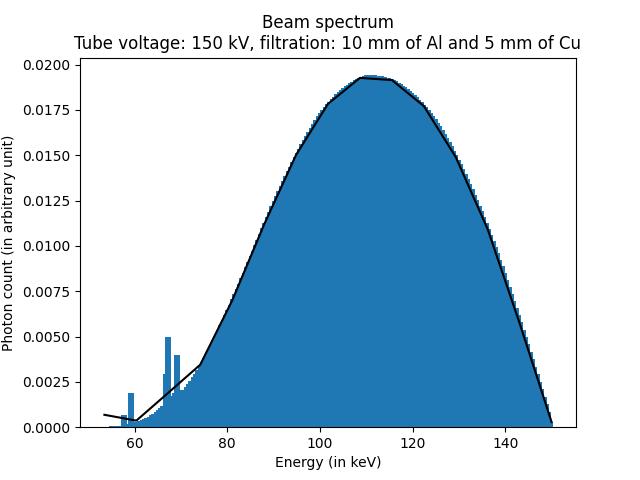

In [10]:
bins = gvxr.getEnergyBins("keV");
counts= np.array(gvxr.getPhotonCountEnergyBins());

fig = plt.figure()
plt.title("Beam spectrum\nTube voltage: 150 kV, filtration: 10 mm of Al and 5 mm of Cu")

plt.bar(filtered_bins, filtered_counts)
plt.plot(xnew, f, color="black")

plt.xlabel("Energy (in keV)")
plt.ylabel("Photon count (in arbitrary unit)")

plt.savefig(current_folder + "/img/spectrum.png", bbox_inches='tight', pad_inches=0)

plt.show()

In [11]:
right_vector = gvxr.getDetectorRightVector()

In [12]:
printDetector()

Detector position: (10.0, 0.0, 0.0) cm
Detector up vector: (0.0, 0.0, -1.0)
Detector right vector: (-0.0, 1.0, 0.0)
Detector size: (32.0, 16.0) cm
Detector number of pixels: (640, 320)


In [13]:
gvxr.setFocalSpotAsRectangle(-40.0, 0, 0.0,
    1.5, 0.5, # Size along the 2D axes
    "cm",
    5, 3); # Number of point sources along each axis

gvxr.rotateSource(25, 0, 0, 1);

In [14]:
x_ray_image_1 = np.array(gvxr.computeXRayImage()).astype(np.single)
gvxr.displayScene()

In [15]:
gvxr.setZoom(1000)

angle = 0.0#math.pi / 2.0
rotation_matrix_x = np.array([ 1, 0, 0, 0,
                               0, math.cos(angle), -math.sin(angle), 0,
                               0, math.sin(angle),  math.cos(angle), 0,
                               0, 0, 0, 1])

rotation_matrix_z = np.array([ math.cos(angle), -math.sin(angle), 0, 0,
                               math.sin(angle),  math.cos(angle), 0, 0,
                               0, 0, 1, 0,
                               0, 0, 0, 1])

rotation_matrix_x.shape = [4,4]
rotation_matrix_z.shape = [4,4]

transformation_matrix = np.identity(4)

transformation_matrix = np.matmul(rotation_matrix_x, transformation_matrix)
transformation_matrix = np.matmul(rotation_matrix_z, transformation_matrix)

gvxr.setSceneRotationMatrix(transformation_matrix.flatten())

gvxr.setWindowBackGroundColour(1, 1, 1)

gvxr.displayScene()

In [16]:
gvxr.displayScene()
screenshot1 = (255 * np.array(gvxr.takeScreenshot())).astype(np.uint8)

In [17]:
gvxr.setDetectorRightVector(1, 1, 0)
printDetector()
x_ray_image_2 = np.array(gvxr.computeXRayImage()).astype(np.single)
gvxr.displayScene()
screenshot2 = (255 * np.array(gvxr.takeScreenshot())).astype(np.uint8)

Detector position: (10.0, 0.0, 0.0) cm
Detector up vector: (0.0, 0.0, -1.0)
Detector right vector: (0.7071068286895752, 0.7071068286895752, 0.0)
Detector size: (32.0, 16.0) cm
Detector number of pixels: (640, 320)


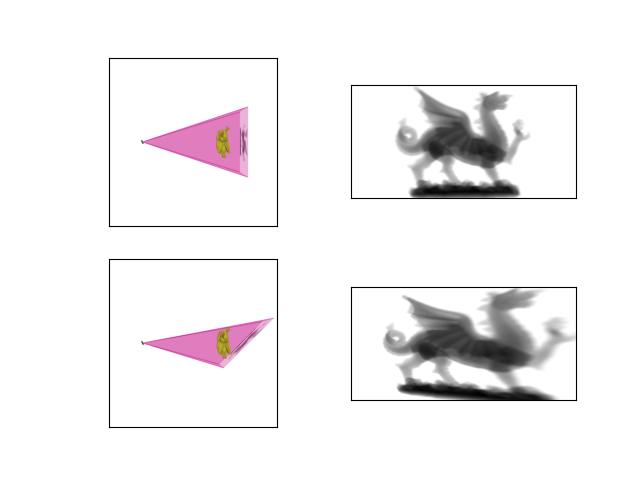

In [18]:
fig, axs = plt.subplots(2, 2)

axs[0,0].imshow(screenshot1)
axs[0,1].imshow(x_ray_image_1, cmap="gray")

axs[1,0].imshow(screenshot2)
axs[1,1].imshow(x_ray_image_2, cmap="gray")


for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

plt.savefig(current_folder + "/img/not_perpendicular.png", bbox_inches='tight', pad_inches=0)
plt.show()

In [19]:
gvxr.setDetectorPosition(10.0, 0.0, 0.0, "cm");
gvxr.setDetectorRightVector(right_vector[0], right_vector[1], right_vector[2])
gvxr.displayScene()

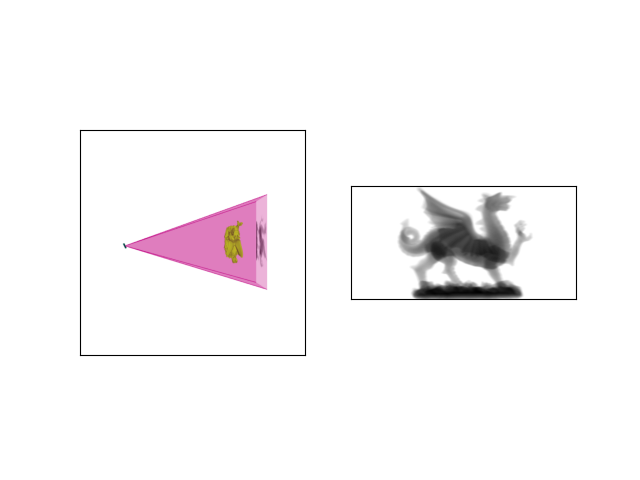

In [20]:
fig, anim_axs = plt.subplots(1, 2)

img1 = anim_axs[0].imshow(screenshot1)
img2 = anim_axs[1].imshow(x_ray_image_1, cmap="gray")

for ax in anim_axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

x = np.linspace(-math.pi, math.pi, 50)

def animate(i):
    gvxr.setFocalSpotAsRectangle(-40.0, 1.5 * math.sin(i), 0.0,
        1.5, 0.5, # Size along the 2D axes
        "cm",
        5, 3); # Number of point sources along each axis

    gvxr.rotateSource(25, 0, 0, 1);
    
    xray = np.array(gvxr.computeXRayImage(), dtype=np.single)
    gvxr.displayScene()
    screenshot = (255 * np.array(gvxr.takeScreenshot())).astype(np.uint8)

    img1.set_data(screenshot)
    img2.set_data(xray)
    return


ani = animation.FuncAnimation(fig, animate, repeat=False, frames=len(x))

# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps=15,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save(current_folder + '/img/anim.gif', writer=writer)

plt.show()

In [21]:
gvxr.destroyAllWindows()
gvxr.terminate()